In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pandas import json_normalize
import json

Converting the Data from the JSON Files into a Dataframe

In [3]:
# to flatten all nested levels, takes in data and outputs to flattened_data list
def flatten(data, flattened_data):
    if isinstance(data, dict):
        for key, value in data.items():
            flatten( (key, value), flattened_data)
    # value is a nested dictionary
    elif isinstance(data[1], dict):
        for key, value in data[1].items():
            flatten( (key, value), flattened_data)
    # value is a nested list
    elif isinstance(data[1], list):
        for item in data[1]:
            flatten(item, flattened_data)
    # flattened key and value
    else:
        length = len(flattened_data)
        key = data[0]
        value = data[1]
        if len(flattened_data[length - 1]) == 0:
            flattened_data[length - 1] = dict()
        flattened_data[length - 1][key] = value

In [4]:
# opens the file for reading
with open('clean1.json', 'r') as file:
    clean1_data = json.load(file)

clean1_flattened_data = []

for item in clean1_data:
    clean1_flattened_data.append([])
    flatten(data = item, flattened_data = clean1_flattened_data)

clean1_df = pd.DataFrame(clean1_flattened_data)
clean1_df.head(30)
clean1_df.shape

# add label 
clean1_df['interference'] = [False] * len(clean1_df)

In [5]:
# repeat with jammer data

with open('jammer1.json', 'r') as file:
    jammer1_data = json.load(file)

jammer1_flattened_data = []

for item in jammer1_data:
    jammer1_flattened_data.append([])
    flatten(data = item, flattened_data = jammer1_flattened_data)

jammer1_df = pd.DataFrame(jammer1_flattened_data)
jammer1_df.head(30)
jammer1_df.shape

jammer1_df['interference'] = [True] * len(jammer1_df)

In [6]:
# join clean and jammer data

combined_df = pd.merge(clean1_df, jammer1_df, how = 'outer')
combined_df.shape

(2283, 36)

In [7]:
combined_df.head(30)

,type,timestamp,carrier_id,cell_id,event_name,pci,cell_identity,sib9_home_enb_name,nof_rach,ue_rnti,...,qci,dl_total_bytes,ul_total_bytes,dl_latency,ul_latency,dl_buffered_bytes,ul_buffered_bytes,mme_ue_s1ap_id,enb_ue_s1ap_id,interference
0,event,1.698340e+09,0,1.0,sector_start,1.0,1,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
6,event,1.698340e+09,0,1.0,s1_context_create,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,True
7,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
8,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,event,1.698340e+09,0,1.0,rrc_log,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Data Preperation: Removing Features with No Predictive Value and Handling NaN Values

In [8]:
# data handling
import numpy as np

# making 'cell_identity' numerical

combined_df['cell_identity'] = pd.to_numeric(combined_df['cell_identity'], errors='coerce')

# finds numerical columns with missing values
nan_count = np.sum(combined_df.isnull(), axis = 0)
nan_detected = nan_count > 0
is_int_or_float = (combined_df.dtypes == 'int64') | (combined_df.dtypes == 'float64')

display(nan_detected[nan_detected & is_int_or_float])

to_impute = combined_df[nan_detected[nan_detected & is_int_or_float].index]

# replaces missing numerical values with mean
for col in to_impute:
    mean = combined_df[col].mean()
    combined_df[col].fillna(value = mean, inplace = True)

cell_id              True
pci                  True
cell_identity        True
nof_rach             True
ue_rnti              True
dl_cqi               True
dl_mcs               True
dl_bitrate           True
dl_bler              True
ul_snr               True
ul_mcs               True
ul_bitrate           True
ul_bler              True
ul_phr               True
ul_bsr               True
rnti                 True
asn1_length          True
asn1_type            True
additional           True
bearer_id            True
qci                  True
dl_total_bytes       True
ul_total_bytes       True
dl_latency           True
ul_latency           True
dl_buffered_bytes    True
ul_buffered_bytes    True
mme_ue_s1ap_id       True
enb_ue_s1ap_id       True
dtype: bool

/var/folders/gz/0y3t0pnn71s33kttb2xffn940000gn/T/ipykernel_46110/213964939.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(value = mean, inplace = True)


In [9]:
# columns with missing non-numerical values

nan_count = np.sum(combined_df.isnull(), axis = 0)
display(nan_count[nan_count > 0])

event_name            2110
sib9_home_enb_name    2279
asn1_message          2120
dtype: int64

In [10]:
# dropping non-numerical columns with no predictive value
combined_df.drop(columns = ['asn1_message', 'sib9_home_enb_name'], inplace = True)

# filling NaN values of event_name
combined_df['event_name'].fillna(value = 'no_event', inplace = True)

/var/folders/gz/0y3t0pnn71s33kttb2xffn940000gn/T/ipykernel_46110/2507852044.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['event_name'].fillna(value = 'no_event', inplace = True)


In [11]:
# confirming there are no more missing values
nan_count = np.sum(combined_df.isnull(), axis = 0)
display(nan_count[nan_count > 0])

Series([], dtype: int64)

In [12]:
# one-hot encoding on non-numerical columns
 
cols_with_strings = []
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        cols_with_strings.append(col)
        print(col, combined_df[col].nunique())

for col in cols_with_strings:
    df_column = pd.get_dummies(combined_df[col])
    combined_df = pd.concat([combined_df, df_column], axis = 1)
    combined_df.drop(col, axis = 1, inplace = True)

type 2
event_name 7


Running K-Means Clustering Model

In [13]:
!pip install scikit-learn
# new python virtual environment may need to be created to
# install scikit-learn, then change the kernel

In [14]:
# scaling is needed because K-means calculates Euclidean distance to determine the similarity
# between data points and if features have different scales, feature with larger scale will
# dominate

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)
scaled_df = pd.DataFrame(scaled_data, columns = combined_df.columns, index = combined_df.index)
scaled_df

,timestamp,carrier_id,cell_id,pci,cell_identity,nof_rach,ue_rnti,dl_cqi,dl_mcs,dl_bitrate,...,interference,event,metrics,no_event,rlf_report,rrc_log,s1_context_create,s1_context_delete,sector_start,sector_stop
0,-1.015338,0.0,0.0,0.0,0.0,-1.682980e-16,0.000000,1.766452e-16,0.000000,-1.615523e-16,...,0.921998,3.492353,-3.492353,-3.492353,-0.10733,-0.252665,-0.041895,-0.029611,33.771290,-0.029611
1,-1.013583,0.0,0.0,0.0,0.0,-1.682980e-16,0.000000,1.766452e-16,0.000000,-1.615523e-16,...,0.921998,3.492353,-3.492353,-3.492353,-0.10733,3.957807,-0.041895,-0.029611,-0.029611,-0.029611
2,-1.013582,0.0,0.0,0.0,0.0,-1.682980e-16,0.000000,1.766452e-16,0.000000,-1.615523e-16,...,0.921998,3.492353,-3.492353,-3.492353,-0.10733,3.957807,-0.041895,-0.029611,-0.029611,-0.029611
3,-1.013520,0.0,0.0,0.0,0.0,-1.682980e-16,0.000000,1.766452e-16,0.000000,-1.615523e-16,...,0.921998,3.492353,-3.492353,-3.492353,-0.10733,3.957807,-0.041895,-0.029611,-0.029611,-0.029611
4,-1.013305,0.0,0.0,0.0,0.0,-1.682980e-16,0.000000,1.766452e-16,0.000000,-1.615523e-16,...,0.921998,3.492353,-3.492353,-3.492353,-0.10733,3.957807,-0.041895,-0.029611,-0.029611,-0.029611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,1.174526,0.0,0.0,0.0,0.0,-7.409063e-01,-0.774397,5.093268e-01,-0.970731,-8.805117e-01,...,-1.084601,-0.286340,0.286340,0.286340,-0.10733,-0.252665,-0.041895,-0.029611,-0.029611,-0.029611
2279,1.174702,0.0,0.0,0.0,0.0,-7.409063e-01,-0.774397,5.093268e-01,-0.970731,-8.805117e-01,...,-1.084601,-0.286340,0.286340,0.286340,-0.10733,-0.252665,-0.041895,-0.029611,-0.029611,-0.029611
2280,1.174879,0.0,0.0,0.0,0.0,-7.409063e-01,-0.774397,-1.439744e+00,-0.970731,-8.805117e-01,...,-1.084601,-0.286340,0.286340,0.286340,-0.10733,-0.252665,-0.041895,-0.029611,-0.029611,-0.029611
2281,1.175055,0.0,0.0,0.0,0.0,-7.409063e-01,-0.774397,-1.439744e+00,-0.970731,-8.805117e-01,...,-1.084601,-0.286340,0.286340,0.286340,-0.10733,-0.252665,-0.041895,-0.029611,-0.029611,-0.029611


In [15]:
from sklearn.cluster import KMeans

kcluster_model = KMeans(n_clusters = 2)
# temporarily drop the label column--that's what we're trying to predict
kcluster_model.fit(scaled_df.drop(columns = ['interference']))
klabels = kcluster_model.labels_

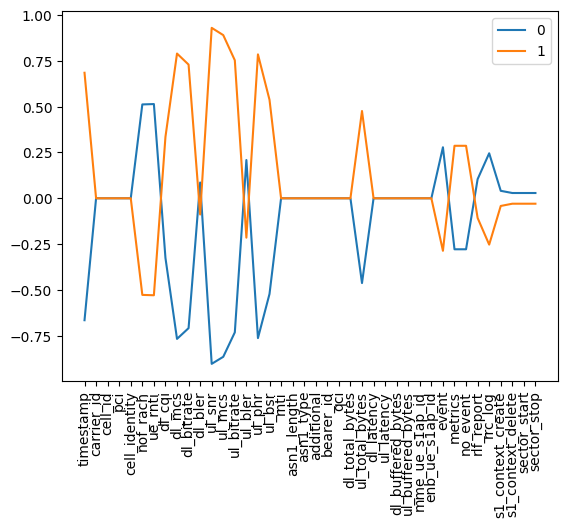

In [16]:
# since the labels (0, 1) contain no information about
# the interference (T/F) they correspond to, it is useful
# to combine the cluster labels with the df they originated
# from

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

features = list((combined_df.drop(columns = ['interference']).columns))

for i in range(2):
    plt.plot(kcluster_model.cluster_centers_[i], label = i)
plt.xticks(range(len(features)), features, fontsize = 10, rotation = 90)
plt.legend()

In [17]:
from sklearn import metrics

display(metrics.homogeneity_score(scaled_df['interference'], klabels))
display(metrics.completeness_score(scaled_df['interference'], klabels))

/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


np.float64(0.36877472604930467)

/Users/rachel/Desktop/SenseOran/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


np.float64(0.3670813599962328)